# matplotlib - 2D and 3D plotting in Python

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

To get started using Matplotlib in a Python program, either include the symbols from the `pylab` module (the easy way):

In [2]:
from pylab import *

or import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. 

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

To use this API from matplotlib, we need to include the symbols in the `pylab` module: 

In [5]:
from pylab import *

### Example

A simple figure with MATLAB-like plotting API:

In [6]:
x = np.linspace(0, 5, 10)
y = x ** 2

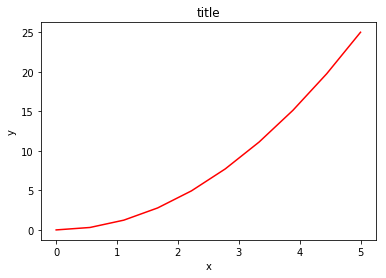

In [7]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

Most of the plotting related functions in MATLAB are covered by the `pylab` module. For example, subplot and color/symbol selection:

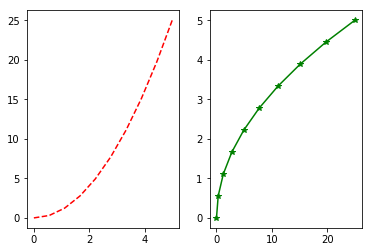

In [8]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots. 

However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.

Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

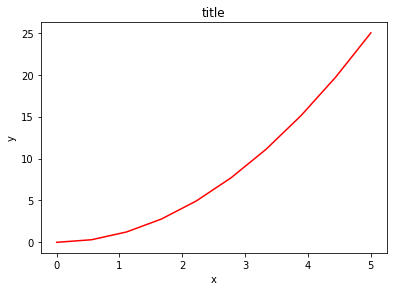

In [9]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

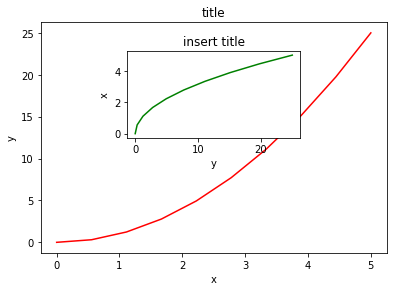

In [10]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.3, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

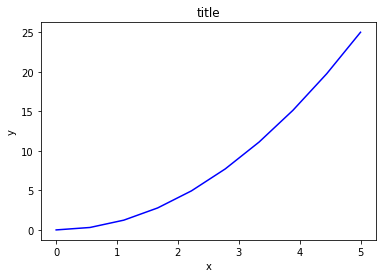

In [11]:
fig, axes = plt.subplots()

axes.plot(x, y, 'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

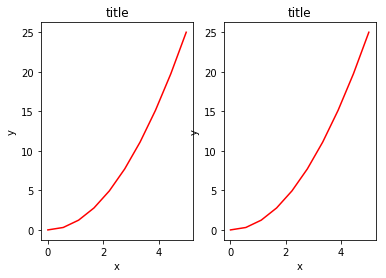

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

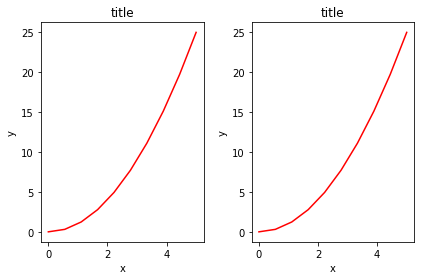

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [14]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

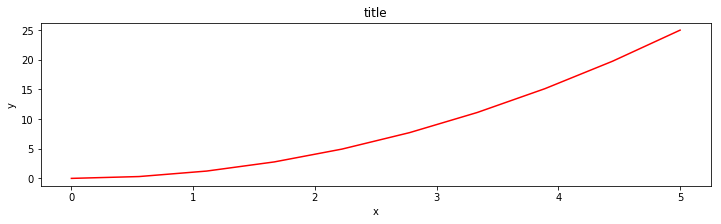

In [15]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [16]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [17]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [18]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [19]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [20]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

In [21]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [22]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

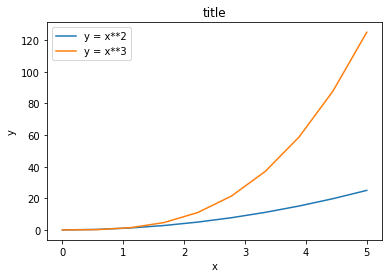

In [23]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

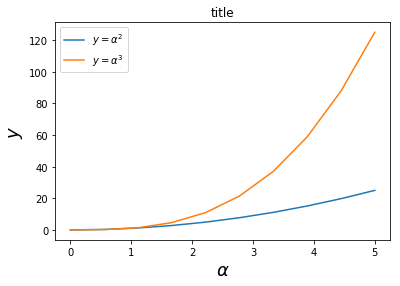

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [25]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

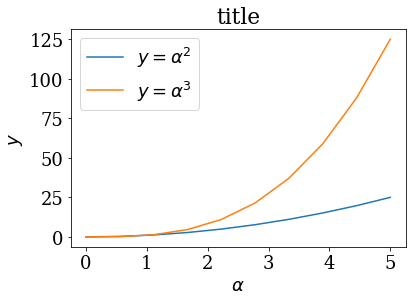

In [26]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the STIX fonts: 

In [27]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

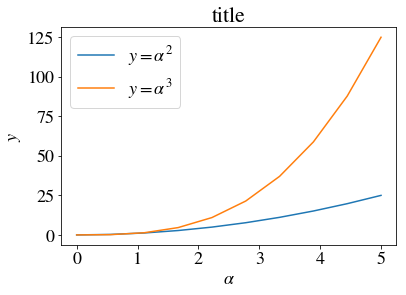

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

Or, alternatively, we can request that matplotlib uses LaTeX to render the text elements in the figure:

In [29]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

WindowsError: [Error 2] The system cannot find the file specified

In [31]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [32]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

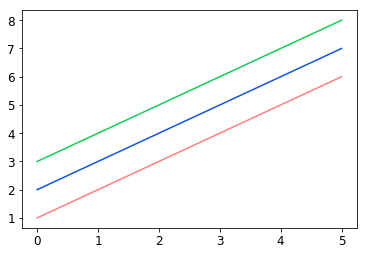

In [33]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

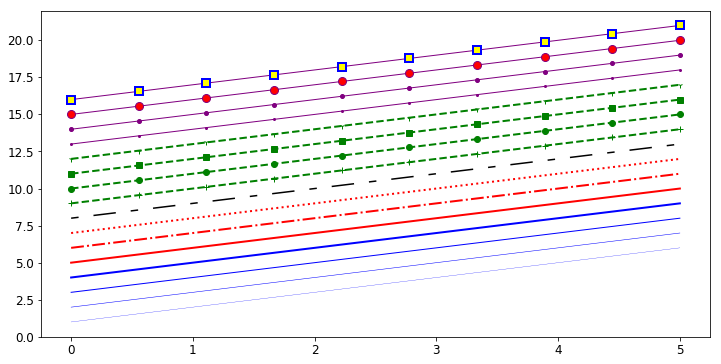

In [34]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

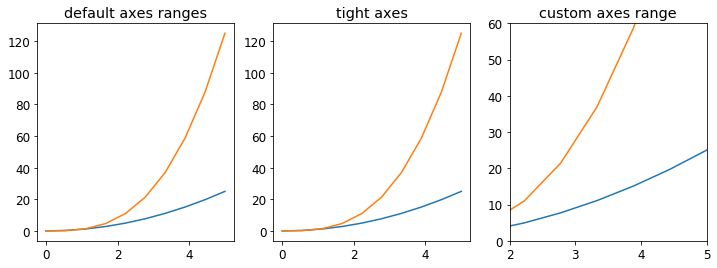

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

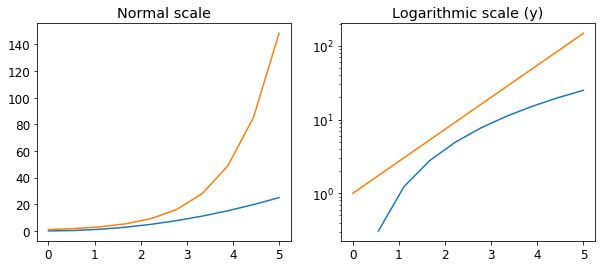

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

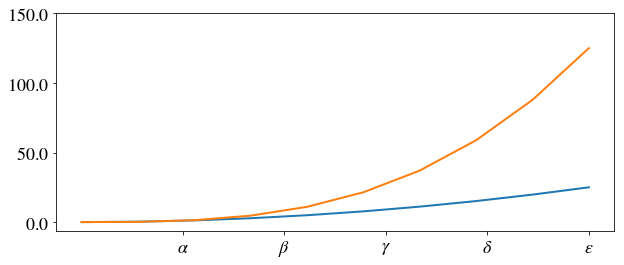

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

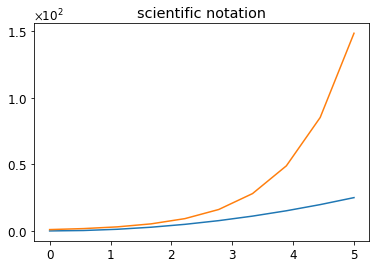

In [38]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Axis number and axis label spacing

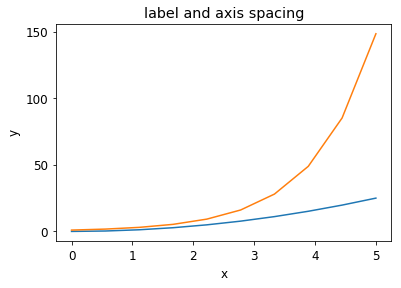

In [39]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [40]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

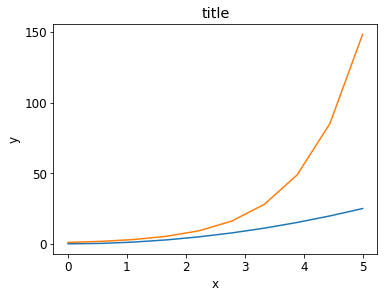

In [41]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

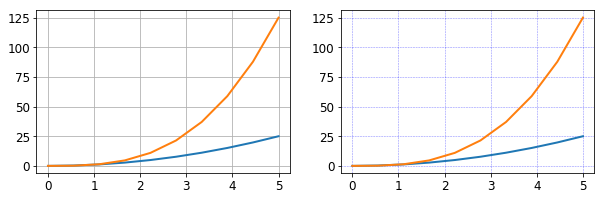

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

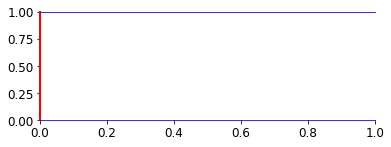

In [43]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

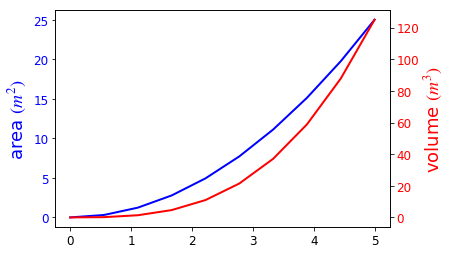

In [44]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

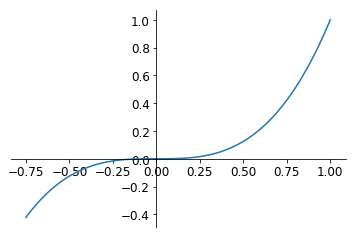

In [45]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [46]:
n = np.array([0,1,2,3,4,5])

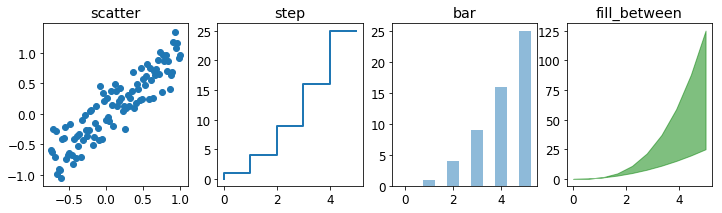

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

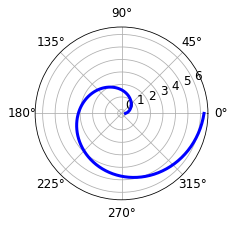

In [48]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

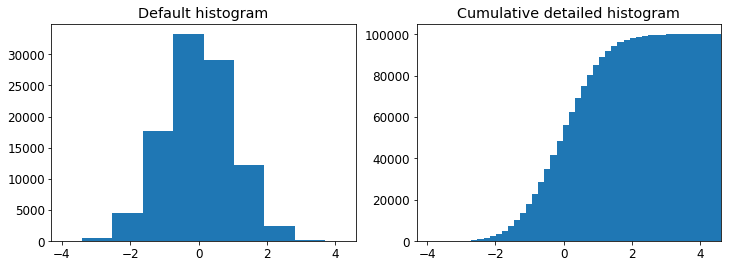

In [49]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

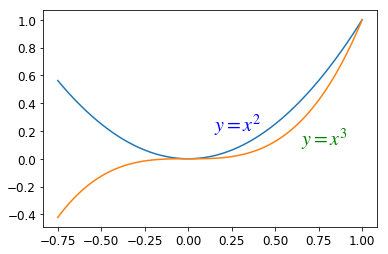

In [50]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

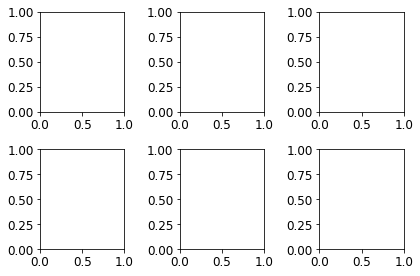

In [51]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

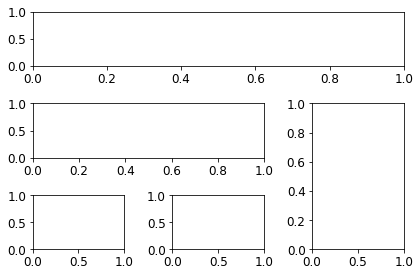

In [52]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [53]:
import matplotlib.gridspec as gridspec

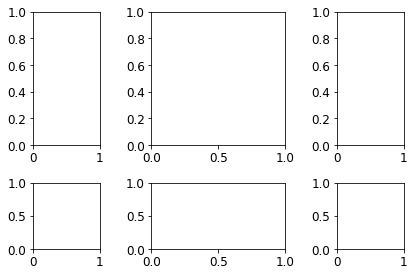

In [54]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

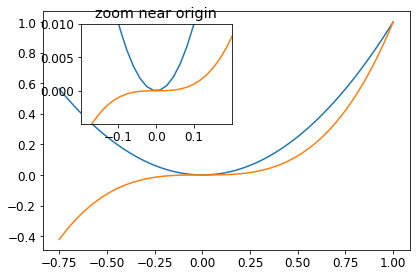

In [55]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [56]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [57]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

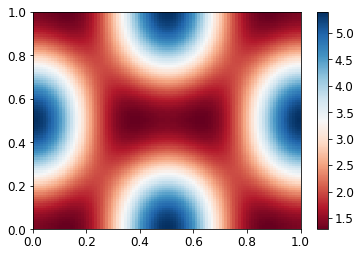

In [58]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

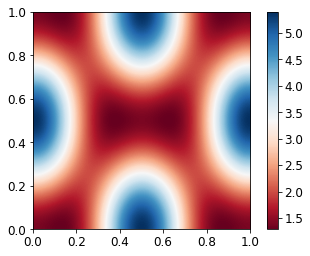

In [59]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

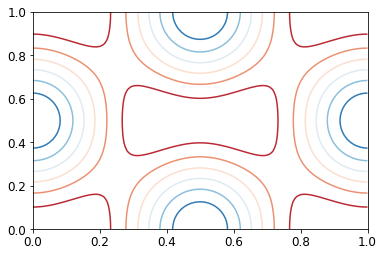

In [60]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [61]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

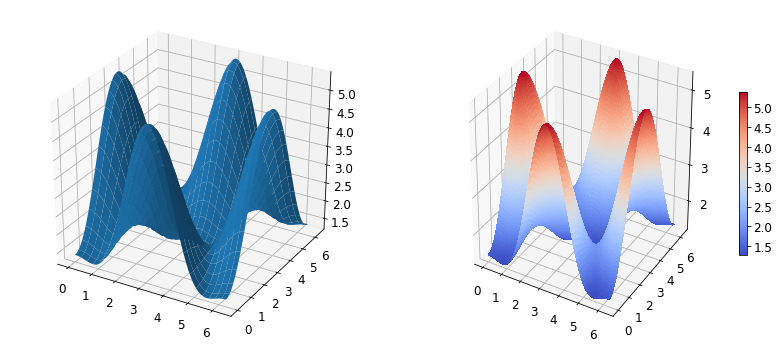

In [62]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

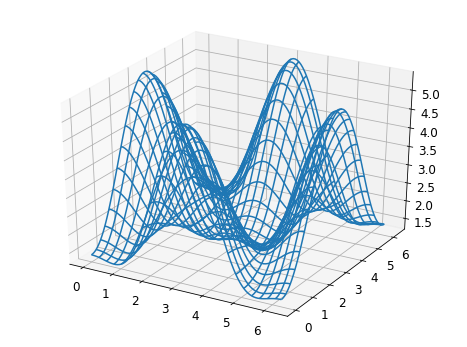

In [63]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

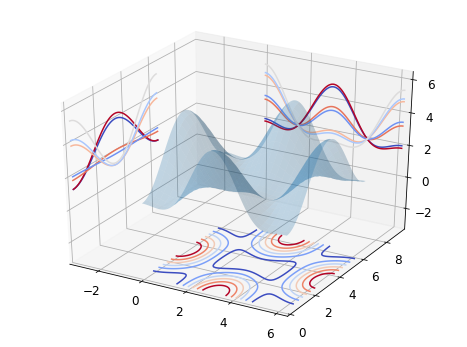

In [64]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Change the view angle

We can change the perspective of a 3D plot using the `view_init` method, which takes two arguments: `elevation` and `azimuth` angle (in degrees):

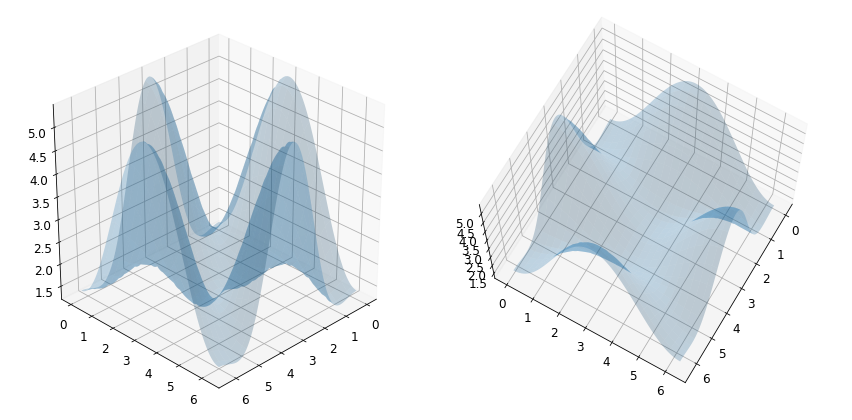

In [65]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

### Animations

Matplotlib also includes a simple API for generating animations for sequences of figures. With the `FuncAnimation` function we can generate a movie file from sequences of figures. The function takes the following arguments: `fig`, a figure canvas, `func`, a function that we provide which updates the figure, `init_func`, a function we provide to setup the figure, `frame`, the number of frames to generate, and `blit`, which tells the animation function to only update parts of the frame which have changed (for smoother animations):

    def init():
        # setup figure

    def update(frame_counter):
        # update figure for new frame

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

    anim.save('animation.mp4', fps=30) # fps = frames per second

To use the animation features in matplotlib we first need to import the module `matplotlib.animation`:

In [66]:
from matplotlib import animation

In [67]:
# solve the ode problem of the double compound pendulum again

from scipy.integrate import odeint
from numpy import cos, sin

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

Generate an animation that shows the positions of the pendulums as a function of time:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\cbook\__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\animation.py", line 1081, in _start
    self._init_draw()
  File "C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\animation.py", line 1798, in _init_draw
    raise RuntimeError('The init_func must return a '
RuntimeError: The init_func must return a sequence of Artist objects.
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter avconv unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: outfile must be *.htm or *.html

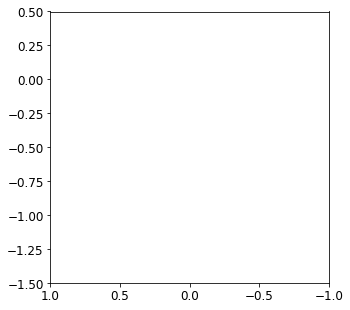

In [68]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
#anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")
anim.save('animation.mp4', fps=20, writer="avconv", codec="libx264")

plt.close(fig)

Note: To generate the movie file we need to have either `ffmpeg` or `avconv` installed. Install it on Ubuntu using:

    $ sudo apt-get install ffmpeg

or (newer versions)

    $ sudo apt-get install libav-tools

On MacOSX, try: 

    $ sudo port install ffmpeg

In [ ]:
from IPython.display import HTML
video = open("animation.mp4", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)

### Backends

Matplotlib has a number of "backends" which are responsible for rendering graphs. The different backends are able to generate graphics with different formats and display/event loops. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate image files (e.g. with the `savefig` function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures. 

A list of available backends are:

In [ ]:
print(matplotlib.rcsetup.all_backends)

The default backend, called `agg`, is based on a library for raster graphics which is great for generating raster formats like PNG.

Normally we don't need to bother with changing the default backend; but sometimes it can be useful to switch to, for example, PDF or GTKCairo (if you are using Linux) to produce high-quality vector graphics instead of raster based graphics. 

#### Generating SVG with the svg backend

In [ ]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG

In [ ]:
#
# Now we are using the svg backend to produce SVG vector graphics
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

In [ ]:
#
# Show the produced SVG file. 
#
SVG(filename="test.svg")

#### The IPython notebook inline backend

When we use IPython notebook it is convenient to use a matplotlib backend that outputs the graphics embedded in the notebook file. To activate this backend, somewhere in the beginning on the notebook, we add:

    %matplotlib inline

It is also possible to activate inline matplotlib plotting with:

    %pylab inline

The difference is that `%pylab inline` imports a number of packages into the global address space (scipy, numpy), while `%matplotlib inline` only sets up inline plotting. In new notebooks created for IPython 1.0+, I would recommend using `%matplotlib inline`, since it is tidier and you have more control over which packages are imported and how. Commonly, scipy and numpy are imported separately with:

    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt

The inline backend has a number of configuration options that can be set by using the IPython magic command `%config` to update settings in `InlineBackend`. For example, we can switch to SVG figures or higher resolution figures with either:

    %config InlineBackend.figure_format='svg'
     
or:

    %config InlineBackend.figure_format='retina'
    
For more information, type:

    %config InlineBackend

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib.pylab as plt
import numpy

In [ ]:
#
# Now we are using the SVG vector graphics displaced inline in the notebook
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

#### Interactive backend (this makes more sense in a python script file)

In [ ]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('Qt4Agg') # or for example MacOSX
import matplotlib.pylab as plt
import numpy as np

In [ ]:
# Now, open an interactive plot window with the Qt4Agg backend
fig, ax = plt.subplots()
t = np.linspace(0, 10, 100)
ax.plot(t, np.cos(t) * np.sin(t))
plt.show()

Note that when we use an interactive backend, we must call `plt.show()` to make the figure appear on the screen.

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


## Versions

In [ ]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib